In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier



import warnings
warnings.filterwarnings('ignore')

## **Pregunta 1**

In [2]:
#carga del dataframe
df=pd.read_csv('hcvdat0.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


### _a)_

In [3]:
#eliminacion de columna 'Unnamed: 0'
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


### _b)_

In [4]:
#codificacion de la variable 'category' y creación de la variable objetivo 'target', Agregando una función lambda para asignar 0 a '0=Blood Donor' y 1 a cualquier otra categoría.
df['target'] = df['Category'].apply(lambda x: 0 if x == '0=Blood Donor' else 1)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


### _c)_

In [5]:
#codificacion de la variable 'suspect', asignando 1 a '0s=suspect Blood Donor' y 0 a cualquier otra categoría con una función lambda.
df['suspect']=df['Category'].apply(lambda x: 1 if x == '0s=suspect Blood Donor' else 0)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1,0
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1,0
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1,0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1,0


In [6]:
df[df['suspect']== 1]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
533,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.30,170.0,345.6,58.6,1,1
534,0s=suspect Blood Donor,48,m,24.9,116.9,49.2,24.3,4.9,3.44,5.25,29.0,83.0,47.8,1,1
535,0s=suspect Blood Donor,49,m,21.6,42.2,9.5,10.6,2.4,3.75,3.01,64.0,38.9,44.8,1,1
536,0s=suspect Blood Donor,55,m,47.3,106.0,208.8,130.6,0.8,14.80,8.08,76.0,71.6,78.3,1,1
537,0s=suspect Blood Donor,71,m,14.9,69.8,19.7,95.2,9.8,13.30,2.61,9.0,7.6,47.0,1,1
538,0s=suspect Blood Donor,74,m,20.3,84.0,22.8,43.0,5.7,4.91,3.19,52.0,218.3,47.8,1,1
539,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.72,32.0,295.6,53.1,1,1


In [7]:
#eliminacion de la columna 'Category' ya que no es necesaria para el análisis posterior.
df.drop(['Category'], axis=1, inplace=True)
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,target,suspect
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,0
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,0
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,0
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1,0
611,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1,0
612,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1,0
613,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1,0


### _d)_

### i)

In [8]:
#revisión de los tipos de datos y valores nulos
df.isnull().sum()

Age         0
Sex         0
ALB         1
ALP        18
ALT         1
AST         0
BIL         0
CHE         0
CHOL       10
CREA        0
GGT         0
PROT        1
target      0
suspect     0
dtype: int64

In [9]:
#porcentaje de valores nulos por columna
missing_percent = df.isnull().mean() * 100
cols_to_dropna = missing_percent[missing_percent < 1].index.tolist()
df = df.dropna(subset=cols_to_dropna)
df.isnull().sum()

Age         0
Sex         0
ALB         0
ALP        16
ALT         0
AST         0
BIL         0
CHE         0
CHOL        8
CREA        0
GGT         0
PROT        0
target      0
suspect     0
dtype: int64

#### ii)

In [10]:
# Ya se eliminaron filas con menos del 1% de valores ausentes
# Ahora, para columnas con >= 1% de valores ausentes, imputar por promedio según clase

cols_to_fillna = missing_percent[missing_percent >= 1].index.tolist()
for col in cols_to_fillna:
    # Usamos la columna 'target' como clase
    df[col] = df.groupby('target')[col].transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()

Age        0
Sex        0
ALB        0
ALP        0
ALT        0
AST        0
BIL        0
CHE        0
CHOL       0
CREA       0
GGT        0
PROT       0
target     0
suspect    0
dtype: int64

### _e)_

In [11]:
# Seleccionamos solo las variables regresoras (excluye 'target' y 'suspect')
regressors = df.drop(['target', 'suspect'], axis=1)

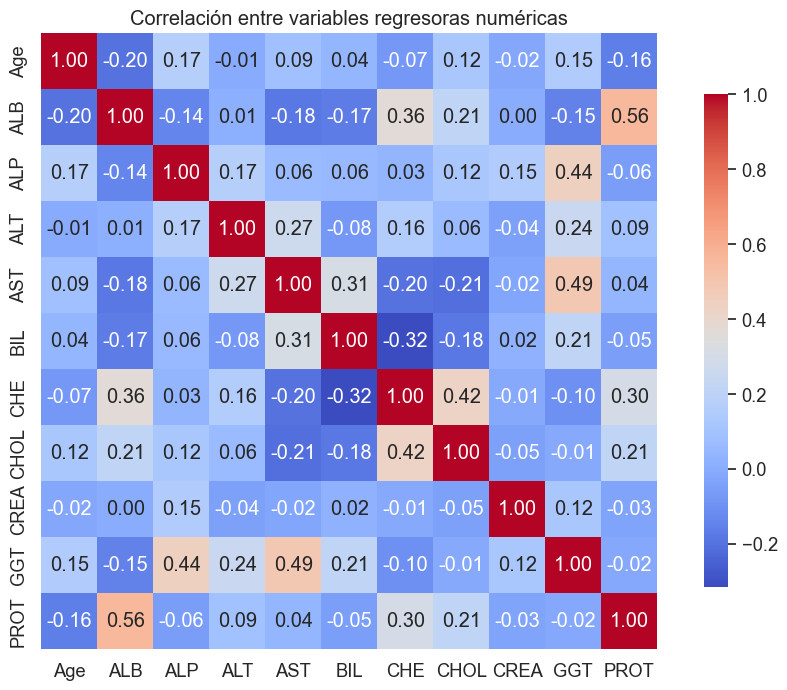

In [12]:
# Seleccionamos solo las variables regresoras numéricas
regressors_num = regressors.select_dtypes(include=[np.number])

# Visualización de la correlación entre las variables regresoras numéricas
sns.set(style='white', font_scale=1.2)
plt.figure(figsize=(12, 8))
corr = regressors_num.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlación entre variables regresoras numéricas')
plt.show()

La mayoría de las correlaciones son bajas, lo que indica que las variables son en su mayoría independientes entre sí.

Las correlaciones más altas (positivas) se observan entre:
ALT y AST (0.27): Ambas son enzimas hepáticas, por lo que es esperable que estén relacionadas.
ALB y PROT (0.56): La albúmina es una fracción importante de las proteínas totales, por lo que su alta correlación es lógica.
AST y GGT (0.49): Ambas pueden elevarse en enfermedades hepáticas.
CHE y CHOL (0.42): La colinesterasa y el colesterol pueden estar relacionados en el metabolismo hepático.
ALP y GGT (0.44): Ambas pueden aumentar en patologías biliares.
No se observan correlaciones negativas fuertes.

**Conclusión**:
No hay multicolinealidad severa entre las variables, pero sí existen pares con correlación moderada, especialmente entre variables relacionadas con función hepática y proteínas. Esto es importante para la interpretación de modelos y la selección de variables.

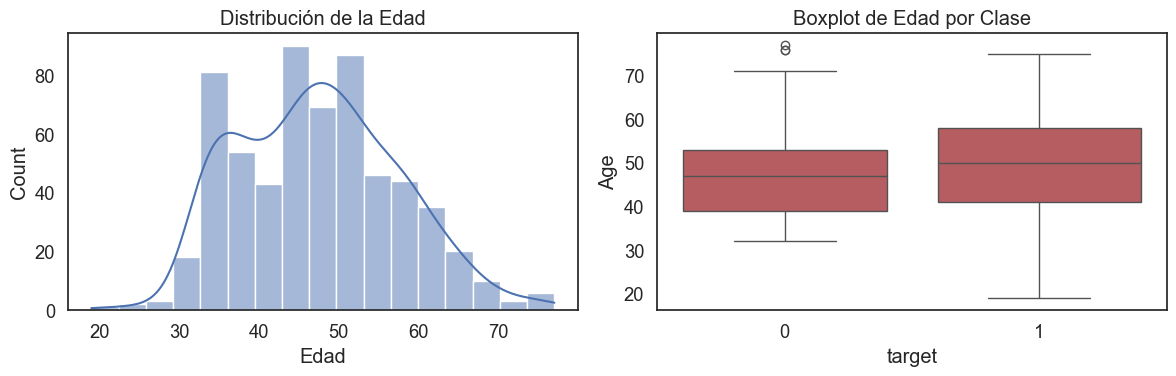

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma con KDE
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de la Edad')
axes[0].set_xlabel('Edad')

# Boxplot por clase
sns.boxplot(x='target', y='Age', data=df, ax=axes[1], color='r')
axes[1].set_title('Boxplot de Edad por Clase')

plt.tight_layout()
plt.show()

### _Análisis de la variable Edad_:

**Distribución**:
El histograma muestra que la edad de los pacientes tiene una distribución aproximadamente normal, aunque con una ligera asimetría hacia la derecha (mayor frecuencia de personas entre 35 y 55 años). Hay menos pacientes en los extremos (menores de 30 y mayores de 65).

**Boxplot por clase**:
El boxplot muestra que la mediana de edad es mayor en la clase 1 (personas con alguna condición) que en la clase 0 (donantes sanos).
Además, la dispersión de la edad es mayor en la clase 1, con valores mínimos más bajos y máximos más altos.
Se observan algunos outliers en la clase 0 (edades altas).

**Conclusión**:
La edad es una variable relevante para diferenciar entre donantes sanos y personas con condiciones, ya que los pacientes con condición tienden a ser mayores. Además, existen algunos valores atípicos, especialmente en la clase 0.

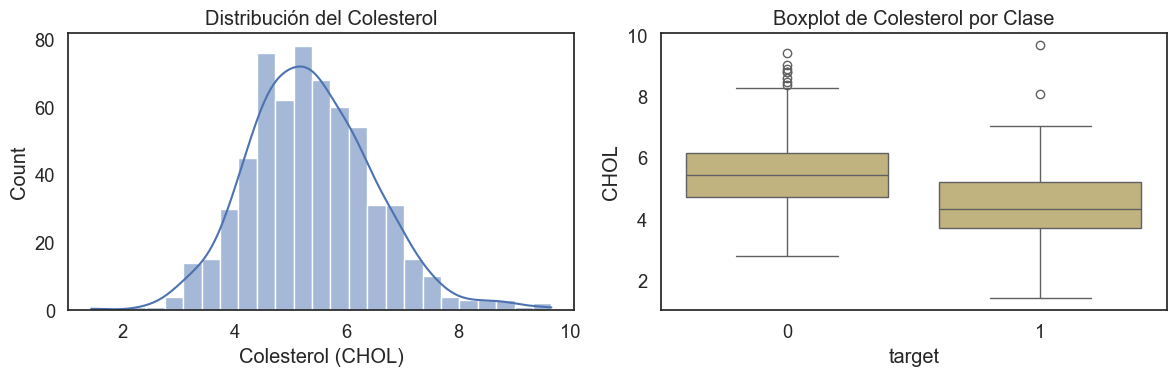

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma con KDE
sns.histplot(df['CHOL'], kde=True, ax=axes[0], color='b')
axes[0].set_title('Distribución del Colesterol')
axes[0].set_xlabel('Colesterol (CHOL)')

# Boxplot por clase
sns.boxplot(x='target', y='CHOL', data=df, ax=axes[1], color='y')
axes[1].set_title('Boxplot de Colesterol por Clase')

plt.tight_layout()
plt.show()

## _Análisis de la variable Colesterol (CHOL)_:

**Distribución**:
El histograma muestra que el colesterol tiene una distribución aproximadamente normal, aunque con ligera asimetría a la derecha. La mayoría de los valores se concentran entre 4 y 6, con pocos valores extremos por debajo de 3 y por encima de 8.

**Boxplot por clase**:
El boxplot indica que la mediana de colesterol es mayor en la clase 0 (donantes sanos) que en la clase 1 (personas con alguna condición). Además, la dispersión es similar en ambas clases, pero hay más valores atípicos (outliers) en la clase 0.
Los valores mínimos y máximos son más extremos en la clase 1.

**Conclusión**:
El colesterol tiende a ser más alto en donantes sanos que en personas con condición, lo que podría indicar que la enfermedad afecta los niveles de colesterol. Existen outliers en ambas clases, especialmente en la clase 0.

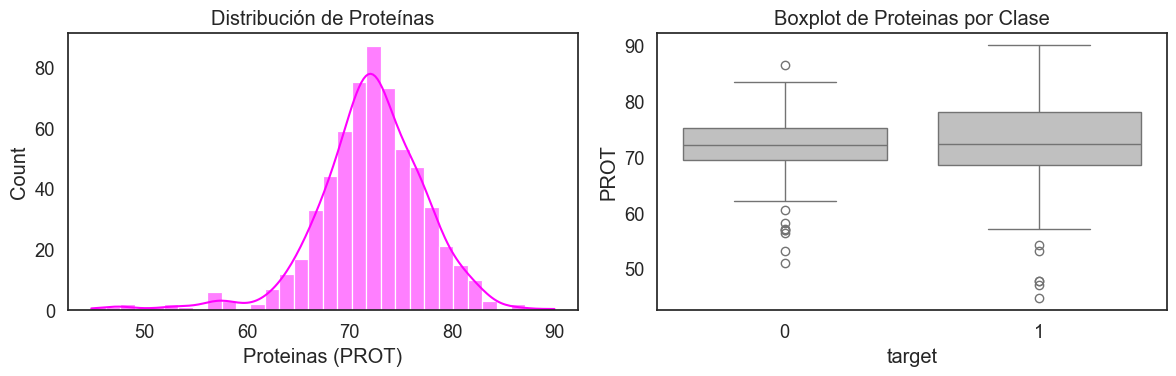

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma con KDE
sns.histplot(df['PROT'], kde=True, ax=axes[0], color='magenta')
axes[0].set_title('Distribución de Proteínas')
axes[0].set_xlabel('Proteinas (PROT)')

# Boxplot por clase
sns.boxplot(x='target', y='PROT', data=df, ax=axes[1], color='Silver')
axes[1].set_title('Boxplot de Proteinas por Clase')

plt.tight_layout()
plt.show()

## _Análisis de la variable Proteínas (PROT)_:

**Distribución**:
El histograma muestra que la variable PROT tiene una distribución aproximadamente normal, centrada cerca de 70, aunque con ligera asimetría a la izquierda y algunos valores bajos y altos como outliers.

**Boxplot por clase**:
El boxplot indica que la mediana de proteínas es ligeramente mayor en la clase 1 (personas con alguna condición) que en la clase 0 (donantes sanos). La dispersión es mayor en la clase 1, con valores mínimos y máximos más extremos.
Se observan varios outliers en ambas clases, especialmente en los valores bajos.

**Conclusión**:
El nivel de proteínas tiende a ser más alto y más variable en personas con condición que en donantes sanos. Esto sugiere que la variable PROT puede ser relevante para diferenciar entre ambas clases, aunque existen valores atípicos que deben considerarse en el análisis.

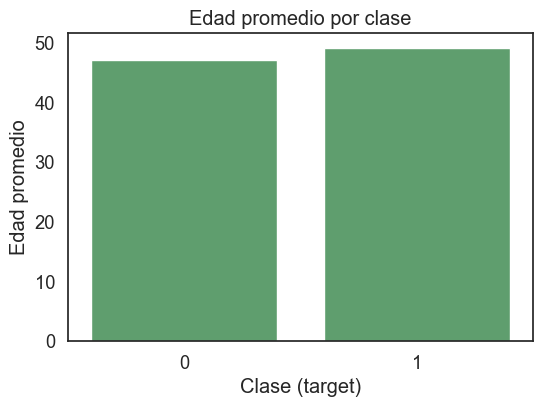

In [16]:
# Calcula la media de edad por clase
age_mean = df.groupby('target')['Age'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='target', y='Age', data=age_mean, ci=None, color='g')
plt.title('Edad promedio por clase')
plt.xlabel('Clase (target)')
plt.ylabel('Edad promedio')
plt.show()

## _Análisis del gráfico de edad promedio por clase_:

El gráfico de barras muestra la edad promedio para cada clase del target:

La clase 0 (donantes sanos) tiene una edad promedio cercana a 47 años.
La clase 1 (personas con alguna condición) tiene una edad promedio mayor, cercana a 49 años.

**Conclusión**:
Las personas con condición tienden a ser, en promedio, mayores que los donantes sanos. Esto refuerza la importancia de la variable edad como factor diferenciador entre ambas clases.

### _f)_

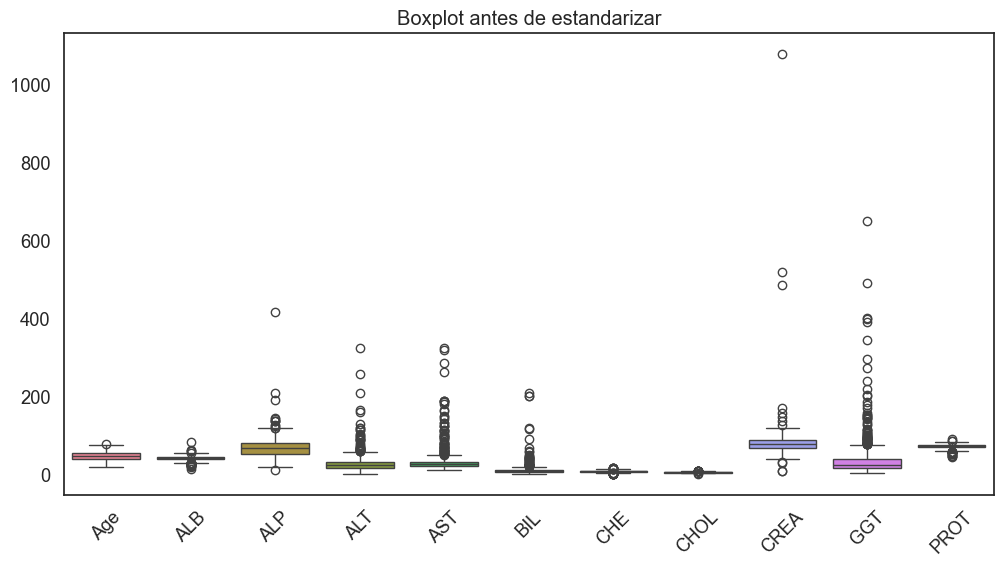

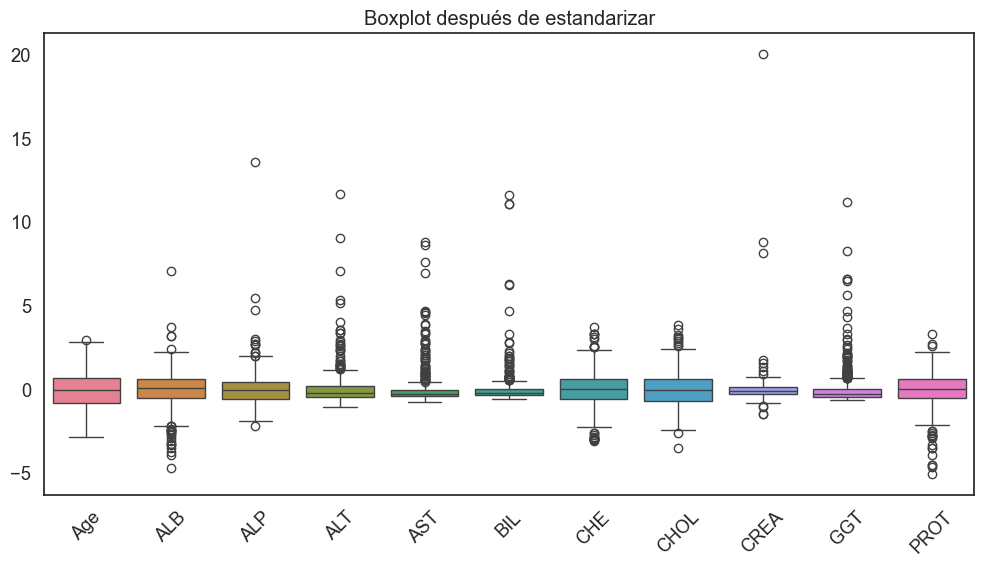

Tamaño entrenamiento: 410, Tamaño test: 202


In [17]:
# Boxplots antes de estandarizar
plt.figure(figsize=(12, 6))
sns.boxplot(data=regressors_num)
plt.title('Boxplot antes de estandarizar')
plt.xticks(rotation=45)
plt.show()

# Estandarización
scaler = StandardScaler()
regressors_num_scaled = pd.DataFrame(scaler.fit_transform(regressors_num), columns=regressors_num.columns)

# Boxplots después de estandarizar
plt.figure(figsize=(12, 6))
sns.boxplot(data=regressors_num_scaled)
plt.title('Boxplot después de estandarizar')
plt.xticks(rotation=45)
plt.show()

# Segmentación de la muestra
X_train, X_test, y_train, y_test = train_test_split(
    regressors_num_scaled, df["target"], test_size=0.33, random_state=42
)
print(f'Tamaño entrenamiento: {X_train.shape[0]}, Tamaño test: {X_test.shape[0]}')

## _Análisis de los boxplots antes y después de estandarizar_:

### **Antes de estandarizar**:
El boxplot muestra que las variables numéricas tienen escalas muy diferentes. Por ejemplo, CREA y GGT presentan valores mucho mayores que el resto, lo que puede afectar negativamente a los modelos de machine learning. Además, se observan numerosos outliers en casi todas las variables, especialmente en ALP, ALT, AST, CREA y GGT.

### **Después de estandarizar**:
Tras aplicar StandardScaler, todas las variables quedan centradas en torno a 0 y con varianza 1, lo que permite compararlas en igualdad de condiciones. Los outliers siguen presentes, pero ahora todas las variables tienen la misma escala, lo que es fundamental para algoritmos sensibles a la magnitud de los datos (como regresión logística o redes neuronales).

## **Conclusión**:
La estandarización es esencial para evitar que las variables con mayor rango dominen el análisis y para asegurar que los modelos interpreten correctamente la importancia relativa de cada variable. Los outliers persisten y podrían requerir un tratamiento adicional si afectan el desempeño del modelo.

El tamaño de los conjuntos de entrenamiento y test es adecuado para este tipo de problema:

**Tamaño entrenamiento**: 410 muestras
**Tamaño test**: 202 muestras

Esto corresponde a una partición aproximada de 67% para entrenamiento y 33% para test, lo cual es estándar en machine learning.
Permite entrenar el modelo con suficiente información y evaluar su desempeño en un conjunto independiente, ayudando a estimar la capacidad de generalización del modelo.

## **Pregunta 2**

In [18]:
# Definición de hiperparámetros
Cs = np.linspace(0.01, 5.0, 200)
l1_ratios = np.linspace(0, 1, 200)

# Modelo de regresión logística con validación cruzada y Elastic Net
logreg_cv = LogisticRegressionCV(
    Cs=Cs,
    cv=5,
    penalty='elasticnet',
    solver='saga',
    l1_ratios=l1_ratios,
    scoring='accuracy',
    max_iter=5000,
    random_state=42,
    n_jobs=-1
)
logreg_cv.fit(X_train, y_train)

# Predicciones
y_pred = logreg_cv.predict(X_test)

# Métricas
print("Mejores hiperparámetros encontrados:")
print(f"Cs óptimo: {logreg_cv.C_[0]}")
print(f"l1_ratio óptimo: {logreg_cv.l1_ratio_[0]}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Importancia de características
importances = np.abs(logreg_cv.coef_[0])
top_features_idx = np.argsort(importances)[-3:][::-1]
top_features = regressors_num.columns[top_features_idx]
print("\nLas tres características con mayor incidencia en la predicción son:")
for feat in top_features:
    print(f"- {feat}")

Mejores hiperparámetros encontrados:
Cs óptimo: 1.1634673366834172
l1_ratio óptimo: 0.0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       172
           1       0.95      0.63      0.76        30

    accuracy                           0.94       202
   macro avg       0.94      0.81      0.86       202
weighted avg       0.94      0.94      0.94       202

Accuracy: 0.9406

Las tres características con mayor incidencia en la predicción son:
- GGT
- AST
- ALP


Esto indica que el modelo clasifica muy bien a los donantes sanos (clase 0), pero tiene menor recall para la clase 1 (personas con condición), aunque su precisión es alta.



## **Pregunta 3**

In [19]:
# Definición de la grilla de hiperparámetros
param_grid = {
    'reg_lambda': np.linspace(0.0, 2.0, 10),
    'reg_alpha': np.linspace(0.0, 1.0, 10),
    'learning_rate': np.linspace(0.1, 10, 20)
}

xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

# Predicciones y métricas
y_pred_xgb = grid_search.predict(X_test)
print("\nReporte de clasificación para XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

Mejores hiperparámetros encontrados:
{'learning_rate': 0.6210526315789474, 'reg_alpha': 0.1111111111111111, 'reg_lambda': 1.3333333333333333}
Mejor accuracy en validación cruzada: 0.9780

Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       0.96      0.87      0.91        30

    accuracy                           0.98       202
   macro avg       0.97      0.93      0.95       202
weighted avg       0.98      0.98      0.97       202

Accuracy: 0.9752


El modelo XGBoost logra un desempeño excelente, con alta precisión y recall en ambas clases, especialmente mejorando el recall de la clase 1 (personas con condición) respecto a la regresión logística. Esto indica que XGBoost es más efectivo para identificar correctamente a los pacientes con condición en este conjunto de datos.

## **Pregunta 4**

In [20]:
# Muestra los hiperparámetros óptimos y métricas
print("Mejores hiperparámetros encontrados para XGBoost:")
print(grid_search.best_params_)
print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

print("\nReporte de clasificación para XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

# Importancia de atributos
importances_xgb = grid_search.best_estimator_.feature_importances_
top_features_idx_xgb = np.argsort(importances_xgb)[-3:][::-1]
top_features_xgb = regressors_num.columns[top_features_idx_xgb]
print("\nLas tres características con mayor importancia en XGBoost son:")
for feat in top_features_xgb:
    print(f"- {feat}")

# Comparación con regresión logística
print("\nComparación con regresión logística:")
print("Accuracy regresión logística:", f"{accuracy_score(y_test, y_pred):.4f}")
print("Accuracy XGBoost:", f"{accuracy_score(y_test, y_pred_xgb):.4f}")

Mejores hiperparámetros encontrados para XGBoost:
{'learning_rate': 0.6210526315789474, 'reg_alpha': 0.1111111111111111, 'reg_lambda': 1.3333333333333333}
Mejor accuracy en validación cruzada: 0.9780

Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       0.96      0.87      0.91        30

    accuracy                           0.98       202
   macro avg       0.97      0.93      0.95       202
weighted avg       0.98      0.98      0.97       202

Accuracy: 0.9752

Las tres características con mayor importancia en XGBoost son:
- AST
- ALT
- CHOL

Comparación con regresión logística:
Accuracy regresión logística: 0.9406
Accuracy XGBoost: 0.9752


In [21]:
print("\n--- Comparación de modelos ---")
print("Regresión Logística:")
print(classification_report(y_test, y_pred))
print(f"Accuracy regresión logística: {accuracy_score(y_test, y_pred):.4f}")

print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy XGBoost: {accuracy_score(y_test, y_pred_xgb):.4f}")


--- Comparación de modelos ---
Regresión Logística:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       172
           1       0.95      0.63      0.76        30

    accuracy                           0.94       202
   macro avg       0.94      0.81      0.86       202
weighted avg       0.94      0.94      0.94       202

Accuracy regresión logística: 0.9406

XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       0.96      0.87      0.91        30

    accuracy                           0.98       202
   macro avg       0.97      0.93      0.95       202
weighted avg       0.98      0.98      0.97       202

Accuracy XGBoost: 0.9752


La comparación de modelos muestra que XGBoost supera claramente a la regresión logística en este problema:

### _Regresión Logística_:

Accuracy: 0.9406
Recall clase 1 (personas con condición): 0.63
El modelo tiende a clasificar muy bien a los donantes sanos, pero tiene dificultades para identificar correctamente a las personas con condición (bajo recall en clase 1).


### _XGBoost_:

Accuracy: 0.9752
Recall clase 1: 0.87

XGBoost mantiene un excelente desempeño en ambas clases, especialmente mejorando la capacidad de identificar correctamente a los pacientes con condición.

## **Conclusión**:
XGBoost es más efectivo para este conjunto de datos, ya que logra un mejor balance entre precisión y recall, especialmente en la clase minoritaria (personas con condición), lo que es fundamental en problemas de salud.